In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import importlib
import math
import sys

sys.path.append("../")

from modules import Common
import modules.Chapter_04 as Chapter_04

# Reload Libraries
importlib.reload(Common)
importlib.reload(Chapter_04)

---
# **Common**
---

In [ ]:
def shuffle_data(x, y):
    indices = np.random.permutation(len(x))
    return x[indices], y[indices]

---
# **Mnist dataset**
---

**Multiclass Classification**
- Samples: 60000 numbers in 28x28 (0-255)
- Classes: Number


**Dataset**

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train) = shuffle_data(x_train, y_train)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

x_train = np.asarray(x_train / 255).astype(np.float32)
x_test = np.asarray(x_test / 255).astype(np.float32)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

**Train**

In [ ]:
epochs = 5
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=10, activation=tf.nn.softmax),
    ]
)

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
    optimizer=tf.keras.optimizers.legacy.RMSprop(),
)

history = model.fit(
    x=x_train, y=y_train, epochs=epochs, validation_split=0.3, verbose=False
)

In [ ]:
Common.plot(data=[history], labels=["Mnist"])

In [ ]:
model.evaluate(x_test, y_test)
y_predict = model.predict(x_test[0:], verbose=False)
print("Prediction: ", np.argmax(y_predict))
print("Ground: ", np.argmax(y_test[0]))
print("Confidence: ", np.max(y_predict))

---
# **Imdb dataset**
---

**Binary Classification**
- Reviews of movies encoded as arrays of integers
- Score of a movie as postive (1.0) or negative (0.0)

**Dataset**

In [ ]:
def multihot_encode_data(x, y, num_words):
    # Multi-hot encoding
    x_encoded = np.zeros(shape=(x.shape[0], num_words))
    for sample_index, word_indices in enumerate(x):
        x_encoded[sample_index][word_indices] = 1
    y_encoded = np.asarray(y).astype(np.float32)
    return x_encoded, y_encoded


num_words = 10000
imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train, y_train = shuffle_data(x_train, y_train)
x_train, y_train = multihot_encode_data(x_train, y_train, num_words)
x_test, y_test = multihot_encode_data(x_test, y_test, num_words)

**Training**

In [ ]:
epochs = 5
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=1, activation=tf.nn.sigmoid),
    ]
)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()],
    optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001),
)

history = model.fit(
    x=x_train, y=y_train, epochs=epochs, validation_split=0.4, verbose=False
)

**Exploration**

In [ ]:
Common.plot(data=[history], labels=["Imdb"])

---
# **Reuters dataset**
---

**Multiclass Classification**
- Newswries
- Topics (46)


**Dataset**

In [ ]:
def multihot_encode_data(x, y, num_words):
    # Multi-hot encoding
    x_encoded = np.zeros(shape=(x.shape[0], num_words))
    for sample_index, word_indices in enumerate(x):
        x_encoded[sample_index][word_indices] = 1
    y_encoded = tf.keras.utils.to_categorical(y)
    return x_encoded, y_encoded


num_words, num_labels = 10000, 46
reuters = tf.keras.datasets.reuters
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

(x_train, y_train) = shuffle_data(x_train, y_train)
(x_train, y_train) = multihot_encode_data(x_train, y_train, num_words)
(x_test, y_test) = multihot_encode_data(x_test, y_test, num_words)

**Train**

In [ ]:
epochs = 10
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=32, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(units=32, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(units=num_labels, activation=tf.nn.softmax),
    ]
)

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
    optimizer=tf.keras.optimizers.legacy.RMSprop(),
)

history = model.fit(
    x=x_train, y=y_train, epochs=epochs, validation_split=0.4, verbose=False
)

**Exploration**

In [ ]:
Common.plot(data=[history], labels=["Reuter"])

---
# **Boston dataset**
---
**Scalar Regression**
- List of housing society with 13 features (all using different scales)
- Predict price of a house given the society features

**Dataset**

In [ ]:
# Dataset
boston = tf.keras.datasets.boston_housing
(x_train, y_train), (x_test, y_test) = boston.load_data()
(x_train, y_train) = shuffle_data(x_train, y_train)
# Feature-wise normalization (Train)
mean = x_train.mean(axis=0)  # Dataset is centered around mean
x_train -= mean
std = x_train.std(axis=0)  # Dataset has unit std
x_train /= std
# Feature-wise normalization (Test)
x_test -= mean
x_test /= std

**Train**  

In [ ]:
epochs = 120
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            units=120,
            kernel_regularizer=tf.keras.regularizers.L2(0.002),
            activation=tf.nn.relu,
        ),
        tf.keras.layers.Dense(
            units=120,
            kernel_regularizer=tf.keras.regularizers.L2(0.002),
            activation=tf.nn.relu,
        ),
        tf.keras.layers.Dense(units=1, activation=None),
    ]
)

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.MeanAbsoluteError()],
    optimizer=tf.keras.optimizers.legacy.RMSprop(),
)

history = model.fit(
    x=x_train, y=y_train, epochs=epochs, validation_split=0.3, verbose=False
)

**Exploration**

In [ ]:
Common.plot(data=[history], labels=["Boston"], window_titles=["MSE", "MAE"])

In [ ]:
y_predict = model.predict(x_test)
for yp, y in zip(y_predict[:5], y_test[:5]):
    print("Ground: ", y)
    print("Predict: ", yp[0])
    print("Error: ", abs(yp[0] - y))
    print()

**K-Fold Cross-Validation**

In [ ]:
def get_fold(input, num_fold, fold_size):
    for fold_count in range(num_fold):
        val_data = input[fold_count * fold_size : (fold_count + 1) * fold_size]
        train_data = np.concatenate(
            (
                input[: fold_count * fold_size],
                input[(fold_count + 1) * fold_size :],
            ),
            axis=0,
        )
        # History per epoch per fold
        # history = model.fit(x,y, x_val, y_val)


# Get average of all folds per epoch

x = np.array(
    [
        np.array([1, 2, 3]),
        np.array([4, 5, 6]),
        np.array([7, 8, 9]),
        np.array([10, 11, 12]),
        np.array([13, 14, 15]),
    ]
)
num_fold = 4
fold_size = len(x) // num_fold

get_fold(x, num_fold, fold_size)

---
# **Linear Classifier**
---

**Dataset**

In [156]:
num_samples = 500
x_neg = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1.0, 0.5], [0.5, 1.0]],
    size=num_samples,
)
y_neg = np.zeros(shape=(num_samples, 1))

x_pos = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1.0, 0.5], [0.5, 1.0]],
    size=num_samples,
)
y_pos = np.ones(shape=(num_samples, 1))

x = np.vstack((x_neg, x_pos)).astype(np.float32)
y = np.vstack((y_neg, y_pos)).astype(np.float32)

x, y = shuffle_data(x, y)

x_train, y_train, x_val, y_val = Common.split_data(x, y, 0.3)

In [157]:
# Loss Function
n = 0.001
epochs = 1500
loss_function = tf.keras.losses.MeanSquaredError()
acc_function = tf.keras.metrics.MeanAbsoluteError()
optimizer_function = tf.keras.optimizers.RMSprop(learning_rate=n)

# Parameters
w = tf.Variable(initial_value=tf.random.uniform(shape=(2, 1)))
b = tf.Variable(initial_value=tf.zeros(shape=(1,)))

# Loss history
history, val_history = [], []

for _ in range(epochs):
    # Forward Pass
    with tf.GradientTape() as tape:
        y_predict = tf.matmul(x_train, w) + b
        loss = loss_function(y_train, y_predict)
    # Backward Pass
    gradients = tape.gradient(loss, [w, b])
    optimizer_function.apply_gradients(zip(gradients, [w, b]))
    # Validation
    y_predict = tf.matmul(x_val, w) + b
    history.append(loss)
    val_history.append(loss_function(y_val, y_predict))

Accuracy Error:  0.028794777
Validation Error:  0.031270143


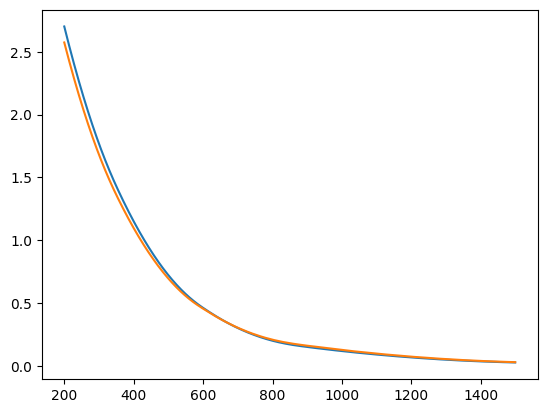

In [158]:
x_axis = range(0, len(history), 1)
ignore_size = 200
plt.plot(
    x_axis[ignore_size:],
    history[ignore_size:],
)
plt.plot(x_axis[ignore_size:], val_history[ignore_size:])
print("Accuracy Error: ", history[-1].numpy())
print("Validation Error: ", val_history[-1].numpy())

In [159]:
y_pred = tf.matmul(x_val, w) + b
print("Ground:")
for ground_value in y_val:
    print(ground_value[0], end=", ")
print()
print("Predict: ")
for predict_value in y_pred.numpy():
    print(abs(np.round(predict_value[0])), end=", ")

Ground:
0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.